In [1]:
%run C:/Users/HSS/dd.py

In [2]:
x1, y1 = [0, 1], [0.5, 0.5]
y2 = [0.8, 0.2]
y3 = [1, 0]

### 베이지안 관점
- Y1: 무정보
- Y2: 0과 1이 어느정도는 다 나올수 있음
- Y3: 100% 확신

### *엔트로피
 - 확률분포가 갖는 이러한 차이를 '하나의 숫자'로 나타낸 것
 - 확률분포의 확신도 혹은 정보량: 무정보에 가까울수록 커진다.

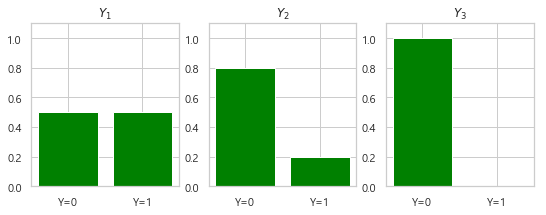

In [10]:
plt.figure(figsize = (9,3))

#무정보
plt.subplot(131)
plt.bar(x1,y1, color = 'green')
plt.xticks([0,1], ['Y=0', 'Y=1'])
plt.ylim(0, 1.1)
plt.title('$Y_1$')

#조금알아
plt.subplot(132)
plt.bar(x1,y2, color = 'green')
plt.xticks([0,1], ['Y=0', 'Y=1'])
plt.ylim(0, 1.1)
plt.title('$Y_2$')

#난 신이다
plt.subplot(133)
plt.bar(x1,y3, color = 'green')
plt.xticks([0,1], ['Y=0', 'Y=1'])
plt.ylim(0, 1.1)
plt.title('$Y_3$')


plt.show()


In [18]:
# Y1, Y2, Y3의 엔트로피 구하기

print('Y1의 엔트로피: ', -(0.5 * np.log2(0.5) + 0.5 * np.log2(0.5)))
print('Y2의 엔트로피: ', -(0.8 * np.log2(0.8) + 0.2 * np.log2(0.2)))
print('Y3의 엔트로피: ', -(1 * np.log2(1) + 0 * np.log2(0)))

# 로그는 0을 받을 수 없기 때문에 아주 작은 값을 대신 넣어준다.
print('10e-15로 구한 Y3의 엔트로피: ', -(1 * np.log2(1) + 0 * np.log2(10e-15)))


# numpy에서 표현할 수 있는 가장 작은 수를 쓰기도 한다.
eps = np.finfo(float).eps
print('eps로 구한 Y3의 엔트로피: ', -(1 * np.log2(1) + eps * np.log2(eps)))

Y1의 엔트로피:  1.0
Y2의 엔트로피:  0.7219280948873623
Y3의 엔트로피:  nan
10e-15로 구한 Y3의 엔트로피:  -0.0
eps로 구한 Y3의 엔트로피:  1.1546319456101628e-14


#### [연습 10.1.1]
- 베르누이 분포에서 mu의 변화와 엔트로피의 변화에 대한 그래프를 그려라

In [32]:
mu = np.arange(0,1,0.01)
entropy = -(mu * np.log2(mu) + (1 - mu) * np.log2(1 - mu))

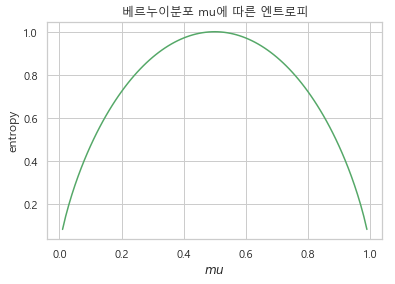

In [47]:
plt.title('베르누이분포 mu에 따른 엔트로피')
plt.plot(mu, entropy, color = 'g')
plt.xlabel('$mu$')
plt.ylabel('entropy')
plt.show()

#### 엔트로피의 최대, 최소
- 어떤 확률이 1으로 정해지면 엔트로피는 0이며 최소값을 갖는다.
- 이산 확률의 클래스가 $2^k$개이고, 할당된 확률이 모두 같을 때 최대값인 $1/2^k$를 갖는다.

In [49]:
# 사실 p(X) * np.log2(p(X))같은 똥개훈련을 하지 않고 스마트하게 엔트로피를 구할 수 있다.
p = [0.5, 0.5]
#base에 데이터 개수
sp.stats.entropy(p, base = 2)

1.0

In [50]:
p = [1/3, 2/3]
sp.stats.entropy(p, base = 2)

0.9182958340544894

#### 가변길이 인코딩

In [51]:
N = 200
p = [1/2, 1/4, 1/8, 1/8]

In [60]:
doc0 = list(''.join([int(N * p[i])*c for i,c in enumerate('ABCD')]))

In [64]:
np.random.shuffle(doc0)
doc = ''.join(doc0)
doc

'ABCDADCCAAADAAAABACDAAAAACCABACDDDAAADBAAAABABBBABBCDCABBADAADADACABBBABAABADAACBAAADBDACABAAACBCAAABBADAABABBCBABCBAAAAAADBBAAABDBABACADACDAACBAADCBBCAABBBAABAAADBBACAAACABAABBAABDABAAACAADAACAABAADB'

['B',
 'A',
 'A',
 'B',
 'B',
 'A',
 'A',
 'D',
 'C',
 'C',
 'B',
 'A',
 'A',
 'C',
 'B',
 'A',
 'A',
 'A',
 'D',
 'B',
 'C',
 'A',
 'A',
 'B',
 'C',
 'D',
 'C',
 'B',
 'B',
 'A',
 'C',
 'C',
 'B',
 'A',
 'D',
 'A',
 'A',
 'B',
 'A',
 'D',
 'B',
 'B',
 'B',
 'D',
 'B',
 'D',
 'A',
 'A',
 'A',
 'B',
 'A',
 'D',
 'B',
 'D',
 'B',
 'A',
 'A',
 'A',
 'A',
 'D',
 'A',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'A',
 'A',
 'B',
 'A',
 'B',
 'A',
 'D',
 'A',
 'A',
 'B',
 'A',
 'D',
 'B',
 'B',
 'A',
 'D',
 'A',
 'B',
 'A',
 'A',
 'D',
 'A',
 'A',
 'A',
 'A',
 'B',
 'A',
 'A',
 'C',
 'B',
 'A',
 'D',
 'B',
 'B',
 'C',
 'A',
 'A',
 'B',
 'C',
 'B',
 'B',
 'B',
 'B',
 'A',
 'C',
 'D',
 'A',
 'A',
 'A',
 'A',
 'C',
 'A',
 'A',
 'A',
 'C',
 'D',
 'A',
 'A',
 'A',
 'A',
 'A',
 'D',
 'B',
 'A',
 'C',
 'A',
 'A',
 'C',
 'D',
 'C',
 'D',
 'A',
 'D',
 'A',
 'A',
 'C',
 'A',
 'D',
 'A',
 'B',
 'C',
 'B',
 'A',
 'D',
 'A',
 'A',
 'A',
 'B',
 'B',
 'A',
 'C',
 'A',
 'A',
 'A',
 'A',
 'C',
 'A',
 'D'